In [147]:
# Imports 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 

In [148]:
df = pd.read_csv("export.csv")
df

,date,stiffness,rating,ascent_type,grade,color,climb_name,gym,location,country,attempts
0,Sun May 23 2021 14:15:39 GMT+0000 (GMT),0,NaN,Flash,v1,Green,NaN,NaN,NaN,NaN,1.0
1,Tue May 25 2021 14:14:54 GMT+0000 (GMT),0,NaN,Redpoint,v0,Purple,NaN,NaN,NaN,NaN,NaN
2,Tue May 25 2021 14:17:42 GMT+0000 (GMT),0,NaN,Flash,v1,White,NaN,NaN,NaN,NaN,1.0
3,Wed Oct 06 2021 14:30:26 GMT+0000 (GMT),0,NaN,Flash,v0,Black,NaN,NaN,NaN,NaN,1.0
4,Wed Oct 06 2021 14:30:31 GMT+0000 (GMT),0,NaN,Flash,v1,Pink,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...
779,Fri Dec 02 2022 21:03:09 GMT+0000 (GMT),0,NaN,Flash,v0,NaN,NaN,Central Rock Gym Cambridge,NaN,NaN,1.0
780,Fri Dec 02 2022 21:03:09 GMT+0000 (GMT),0,NaN,Flash,v1,NaN,NaN,NaN,NaN,NaN,1.0
781,Fri Dec 02 2022 21:03:18 GMT+0000 (GMT),0,NaN,Flash,v1,NaN,NaN,Central Rock Gym Cambridge,NaN,NaN,1.0
782,Fri Dec 02 2022 22:17:31 GMT+0000 (GMT),0,NaN,Flash,v3,NaN,NaN,Central Rock Gym Cambridge,NaN,NaN,1.0


In [149]:
# Preview of what the logbook looks like 
data_2022 = df[df['date'].str.contains("2022")]
data_2021 = df[df['date'].str.contains("2021")]

In [150]:
# Verify that each year is segmented correctly 
data_2022

,date,stiffness,rating,ascent_type,grade,color,climb_name,gym,location,country,attempts
240,Tue Jan 04 2022 02:10:36 GMT+0000 (GMT),0,NaN,Flash,v1,Yellow,NaN,Touchstone Dogpatch Boulders,NaN,NaN,1.0
241,Tue Jan 04 2022 02:13:48 GMT+0000 (GMT),0,NaN,Redpoint,v1,Purple,NaN,Touchstone Dogpatch Boulders,NaN,NaN,NaN
242,Tue Jan 04 2022 02:26:54 GMT+0000 (GMT),0,NaN,Flash,v2,Pink,NaN,Touchstone Dogpatch Boulders,NaN,NaN,1.0
243,Tue Jan 04 2022 02:48:33 GMT+0000 (GMT),0,NaN,Flash,v4,Purple,NaN,NaN,NaN,NaN,1.0
244,Tue Jan 04 2022 03:43:55 GMT+0000 (GMT),0,NaN,Redpoint,v4,NaN,NaN,NaN,NaN,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...
779,Fri Dec 02 2022 21:03:09 GMT+0000 (GMT),0,NaN,Flash,v0,NaN,NaN,Central Rock Gym Cambridge,NaN,NaN,1.0
780,Fri Dec 02 2022 21:03:09 GMT+0000 (GMT),0,NaN,Flash,v1,NaN,NaN,NaN,NaN,NaN,1.0
781,Fri Dec 02 2022 21:03:18 GMT+0000 (GMT),0,NaN,Flash,v1,NaN,NaN,Central Rock Gym Cambridge,NaN,NaN,1.0
782,Fri Dec 02 2022 22:17:31 GMT+0000 (GMT),0,NaN,Flash,v3,NaN,NaN,Central Rock Gym Cambridge,NaN,NaN,1.0


<AxesSubplot:xlabel='grade', ylabel='frequency'>

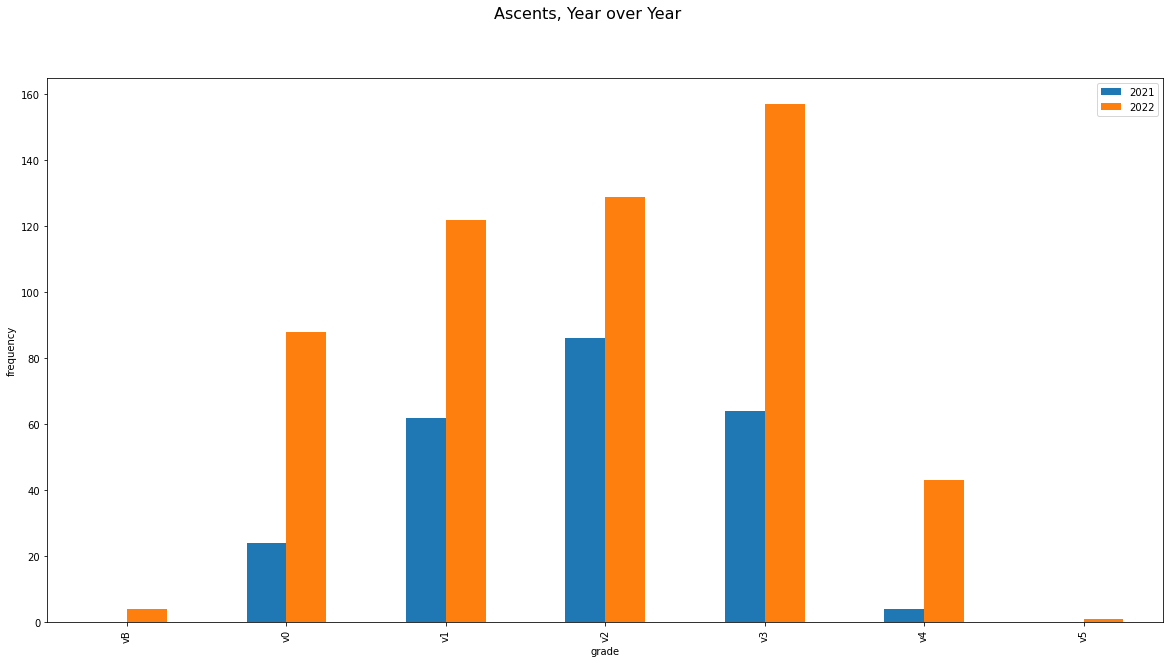

In [151]:
# Year over year distribution 

fig, ax = plt.subplots()
# Generate base frequency plot of current year 
freq_df = data_2022['grade'].value_counts().to_frame().sort_index()
# Add past year's data 
freq_df["2021"] = data_2021['grade'].value_counts().to_frame().sort_index()
freq_df = freq_df.fillna(0).astype("int")
freq_df.reset_index(inplace=True)
# Rename 'grade' column to year 
freq_df.rename(columns = {'grade':'2022', 'index': 'grade'}, inplace = True)
freq_df = freq_df.apply(np.roll, shift=1)
freq_df = freq_df.iloc[:, [0, 2, 1]]
freq_df
fig.suptitle('Ascents, Year over Year', fontsize=16)
freq_df.plot(ax=ax, kind='bar', x='grade', xlabel='grade', ylabel='frequency', figsize=(20, 10))

<AxesSubplot:title={'center':'Ascent types'}, xlabel='grade', ylabel='frequency'>

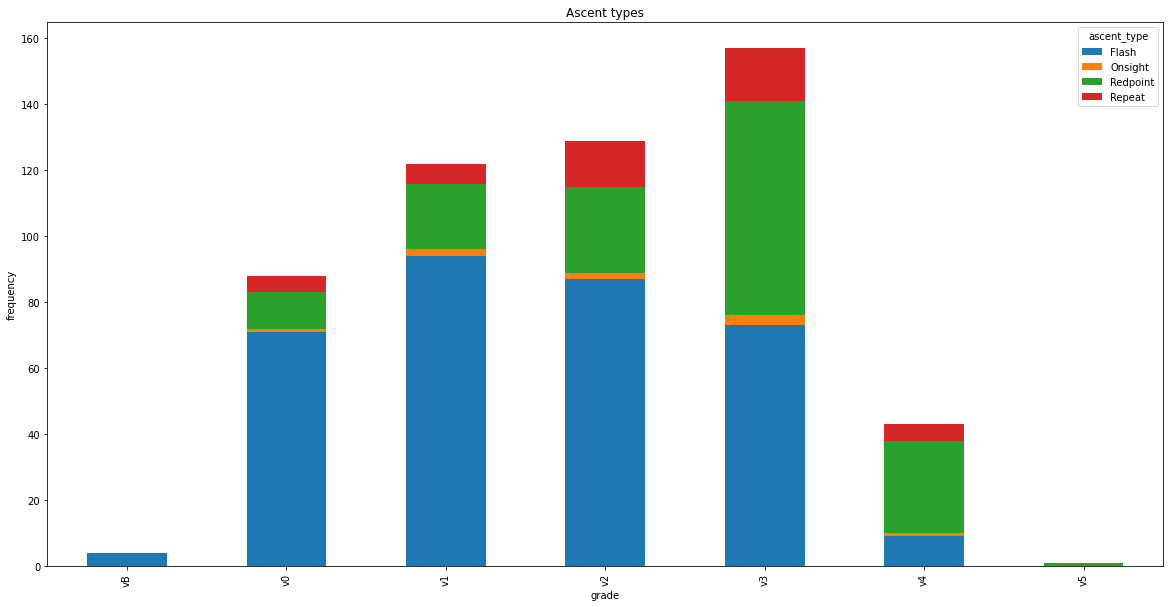

In [152]:
# Only looking at 2022 (or most recent year)
df = data_2022.groupby(['grade', 'ascent_type']).size().unstack()
df = df.fillna(0).astype("int")
df.reset_index(inplace=True)
df = df.apply(np.roll, shift=1)
df.plot(kind='bar', stacked=True, x = 'grade', xlabel='grade', ylabel='frequency', figsize=(
    20, 10), title='Ascent types')

array([<AxesSubplot:ylabel='gym'>], dtype=object)

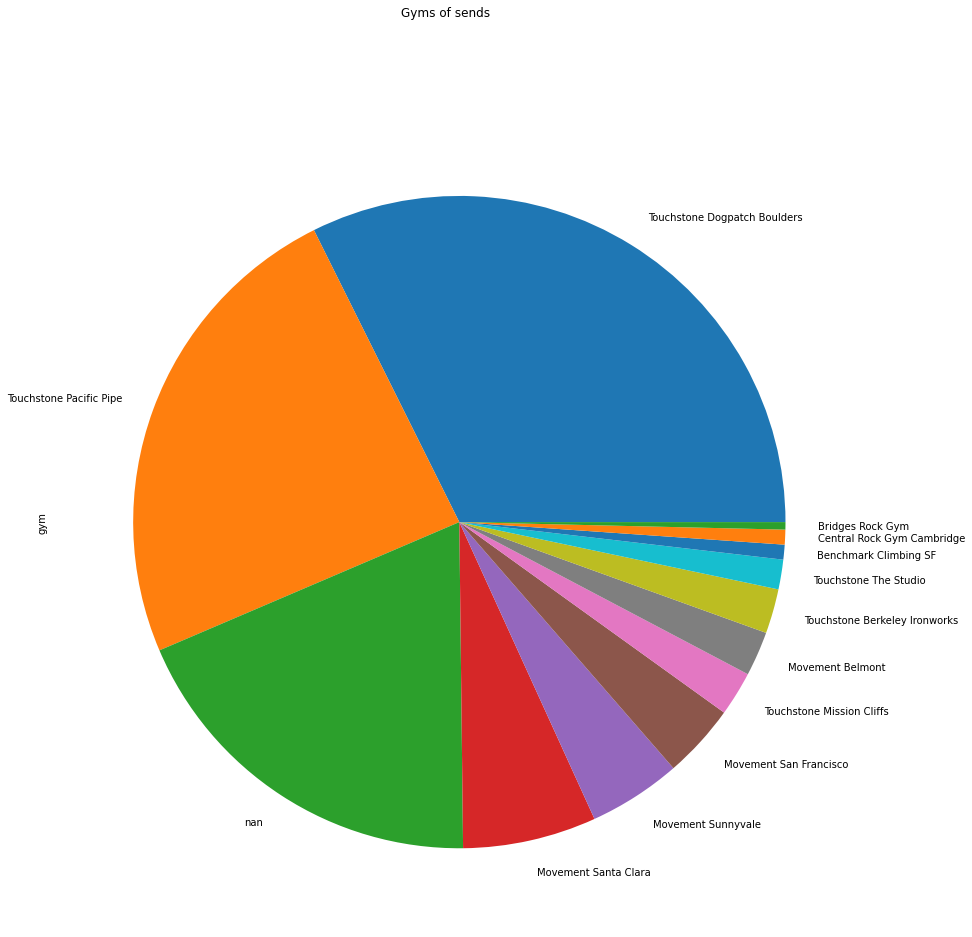

In [153]:
# Locations climbed 
loc_df = data_2022["gym"].value_counts(dropna=False) 
loc_df.plot(kind='pie', subplots=True, figsize=(15, 15), title="Gyms of sends")

array([<AxesSubplot:ylabel='color'>], dtype=object)

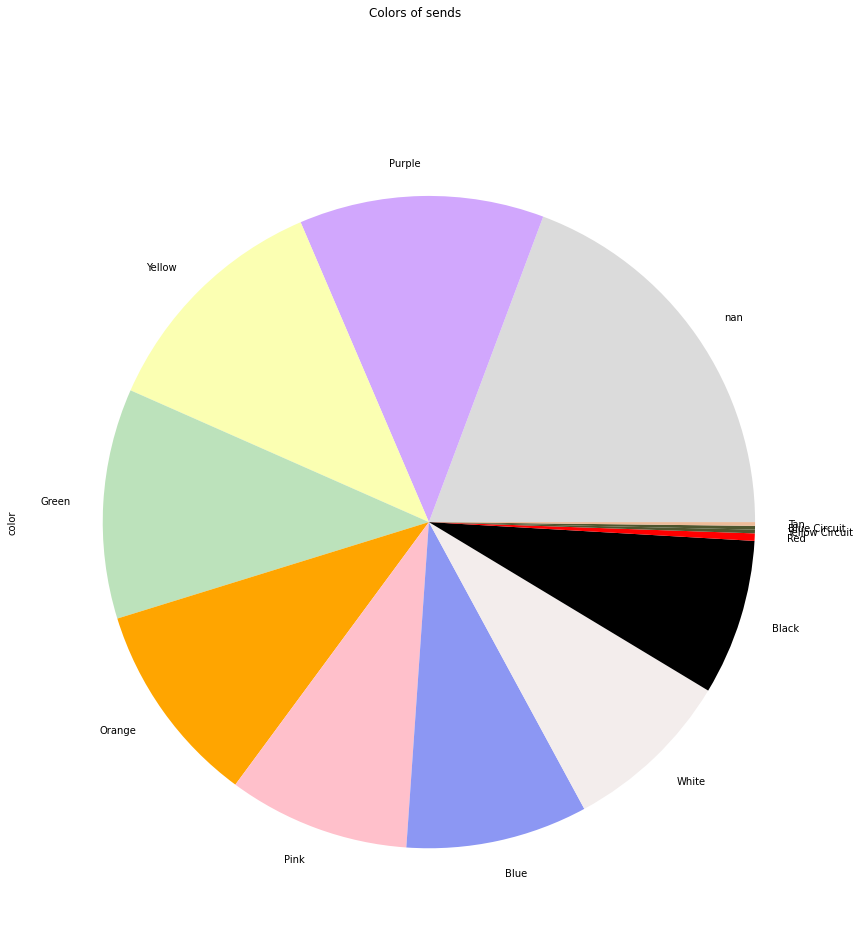

In [154]:
# Color bias? 
color_df = data_2022["color"].value_counts(dropna=False) 
colors = ['#DBDBDB', '#D1A7FD', '#FBFFB2', '#BCE2BB', 'orange', 'pink', '#8C97F3', '#F3EDEC', 'black', 'red', '#4F562E', '#4F562E', '#EDBB99']
color_df.plot(
    kind='pie', subplots=True, figsize=(15, 15), title="Colors of sends", colors=colors)